In [1]:
import networkx as nx 
import matplotlib.pyplot as plt 
import seaborn
%matplotlib inline

In [2]:
GA = nx.read_gexf('data/ga_graph.gexf')
print(nx.info(GA))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


### NetworkX with Matplotlib

Pros:
    
    - Easy
    - Some customisation 

Cons:

    - Looks 'dated' (not great for publication/productizing)
    - Not interactive 
    - Few layout options
    

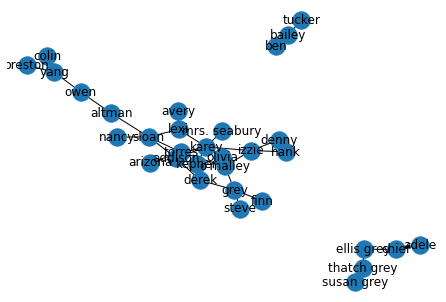

In [3]:
nx.draw(GA, with_labels=True)

Random layouts

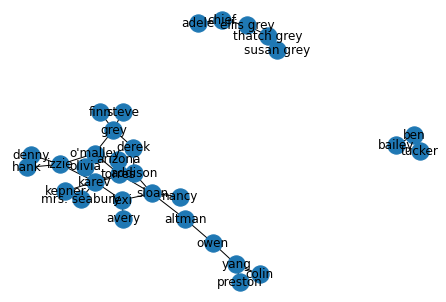

In [4]:
nx.draw(GA, with_labels=True)

### NetworkX detailed plotting

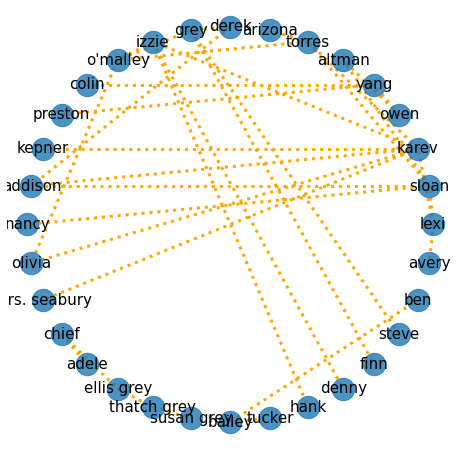

In [5]:
#Matplotlib options
plt.figure(figsize=(8,8))
plt.axis('off')

#generate layout and place nodes and edges
layout = nx.circular_layout(GA)

#plot nodes, edges and labels with options
nx.draw_networkx_nodes(GA, pos=layout, node_size=500, alpha = 0.8)
nx.draw_networkx_edges(GA, pos=layout, width=3, style='dotted', edge_color = 'orange')
nx.draw_networkx_labels(GA, pos=layout, font_size=15)

plt.show()

### Detailed Plotting with Colors by Attribute

In [6]:
from seaborn import color_palette, set_style, palplot

In [7]:
dead_or_alive = {
    'karev' : 'alive',
    'hank' : 'alive',
    'izzie' : 'alive',
    'mrs. seabury' : 'alive',
    'ben' : 'alive',
    'grey' : 'alive',
    'sloan' : 'dead',
    'steve' : 'alive',
    'kepner' : 'alive',
    'colin' : 'alive',
    'avery' : 'alive',
    'bailey' : 'alive',
    'chief' : 'alive',
    'preston' : 'alive',
    'ellis grey' : 'dead',
    "o'malley" : 'dead',
    'lexi' : 'dead',
    'torres' : 'alive',
    'yang' : 'alive',
    'addison' : 'alive',
    'olivia' : 'alive',
    'altman' : 'alive',
    'denny' : 'dead',
    'arizona' : 'alive',
    'adele' : 'dead',
    'derek' : 'dead',
    'nancy' : 'alive',
    'thatch grey' : 'alive',
    'susan grey' : 'dead',
    'owen' : 'alive',
    'tucker' : 'alive',
    'finn' : 'alive'
}

In [8]:
nx.set_node_attributes(GA,dead_or_alive,'status')

In [9]:
def create_color_map(G, attribute, seaborn_palette='colorblind'):
    """Returns a list of hex color mappings for node attributes"""
    attributes = [G.nodes[label][attribute] for label in G.nodes()]
    #Get the set of possible attributes
    attributes_unique = list(set(attributes))
    num_values = len(attributes_unique)

    #generate color palette from seaborn
    palette = color_palette(seaborn_palette, num_values).as_hex()

    #create a mapping of attribute to color 
    color_map = dict(zip(attributes_unique,palette))

    #map the attribute for each node to the color it represents
    node_colors = [color_map[attribute] for attribute in attributes]

    return node_colors, color_map, palette

In [10]:
node_colors, color_map, palette = create_color_map(GA, 'status')

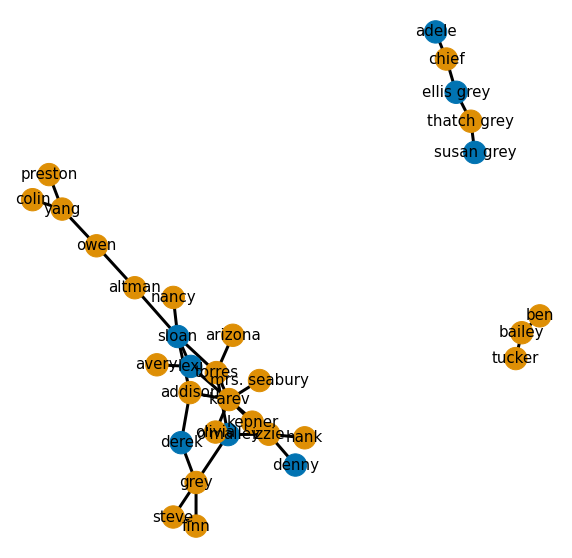

{'dead': '#0173b2', 'alive': '#de8f05'}


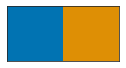

In [11]:
set_style('white')
plt.figure(figsize=(10,10))
plt.axis('off')

layout = nx.spring_layout(GA)
nx.draw_networkx_nodes(GA, layout, node_color = node_colors, node_size=500)
nx.draw_networkx_edges(GA, layout, width=3)
nx.draw_networkx_labels(GA, layout, font_size=15)

plt.show()

print(color_map)
palplot(palette)


Other Vizualization:
- plot.ly
- d3 
- gephi 
- cytoscape/ cyrest 
- python-igraph

### Plotly

In [12]:
import plotly.express as px 
data_canada = px.data.gapminder().query("country =='Canada'")
fig = px.bar(data_canada, x='year', y='pop')
fig.show()

In [13]:
%%writefile interactive_graph.py 

import plotly.graph_objects as go
import networkx as nx 

class CreatePlotlyViz:

    def __init__(self,G):
        self.G = G
        self.layout = nx.spring_layout(G)

    def edge_trace(self):            
        '''
        Input: G: networkx graph 
        Output: edge_trace
        '''
        edge_x = []
        edge_y = []
        for edge in self.G.edges():
            x0,y0 = self.layout[edge[0]]
            x1,y1 = self.layout[edge[1]]
            edge_x.append(x0)
            edge_x.append(x1)
            edge_x.append(None)
            edge_y.append(y0)
            edge_y.append(y1)
            edge_y.append(None)
        return go.Scatter(
            x=edge_x, y=edge_y,
            line=dict(width=0.5, color='#888'),
            hoverinfo='none',
            mode='lines')
        
    def node_trace(self):
        node_x = []
        node_y = []
        for node in self.G.nodes():
            x, y = self.layout[node]
            node_x.append(x)
            node_y.append(y)

        return go.Scatter(
            x=node_x, y=node_y,
            mode='markers',
            hoverinfo='text',
            marker=dict(
                showscale=True,
                colorscale='YlGnBu',
                reversescale=True,
                color=[],
                size=10,
                colorbar=dict(
                    thickness=15,
                    title='Node Connections',
                    xanchor='left',
                    titleside='right'
                ),
                line_width=2))



    def node_label_color(self):
        node_adjacencies = []
        node_text = []
        for node, adjacencies in self.G.adjacency():
            node_adjacencies.append(len(adjacencies))
            node_text.append(f'{node} : {len(adjacencies)}')
        return node_adjacencies, node_text

    def fig(self):
        edge_trace = self.edge_trace()
        node_trace = self.node_trace()
        node_trace.marker.color, node_trace.text = self.node_label_color()
        fig = go.Figure(data=[edge_trace, node_trace],
            layout=go.Layout(
            showlegend=False,
            hovermode='closest',
            margin=dict(b=20,l=5,r=5,t=40),
            xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
            yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
            )
        fig.show()
               


Overwriting interactive_graph.py


In [15]:
from interactive_graph import CreatePlotlyViz

ga = CreatePlotlyViz(GA)
ga.fig()


### Playing with GOT dataset

In [16]:
import pandas as pd 
fields = ['Source','Target']
got = pd.read_csv('data/got1.csv', usecols=fields)
got = got.append(pd.read_csv('data/got2.csv', usecols=fields), ignore_index = True)
got = got.append(pd.read_csv('data/got3.csv', usecols=fields), ignore_index = True)
got = got.append(pd.read_csv('data/got4.csv', usecols=fields), ignore_index = True)
got = got.append(pd.read_csv('data/got5.csv', usecols=fields), ignore_index = True)
got.tail()

,Source,Target
3904,Tyrion-Lannister,Ysilla
3905,Tywin-Lannister,Wylis-Manderly
3906,Victarion-Greyjoy,Wulfe
3907,Walder-Frey-(son-of-Jammos),Walder-Frey-(son-of-Merrett)
3908,Yandry,Ysilla


In [17]:
GOT = nx.from_pandas_edgelist(got,source='Source',target='Target')

In [18]:
got = CreatePlotlyViz(GOT)
got.fig()